In [1]:
import lightgbm as lgb
import numpy as np
import pickle
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt


In [2]:
def save_pkl(file_dir, data):
    f = open(file_dir,"wb")
    pickle.dump(data, f, protocol=4)
    f.close()
    
def read_pkl(file_dir):
    f = open(file_dir,"rb")
    data = pickle.load(f)
    return data

In [3]:

X = np.load("Aal/X_all.npy")
Y_NO2 = np.load("Aal/Y_NO2_all.npy")
Y_NOx = np.load("Aal/Y_NOx_all.npy")

In [78]:
Y_NOx.shape

(1004544,)

In [4]:
gbm = read_pkl("Aal/lightgbm_NOx_1.model")
test_X = np.load("Aal/X_test.npy")
test_Y = np.load("Aal/Y_NOx_test.npy")

In [21]:
test_X[0:98]

array([[ 67.47,  30.22,   5.  , ..., 140.6 , 131.4 ,   0.  ],
       [ 67.47,  30.22,   5.  , ..., 131.4 , 121.9 ,   1.  ],
       [ 67.47,  30.22,   5.  , ..., 121.9 , 121.9 ,   2.  ],
       ...,
       [ 70.57,  30.63,   5.  , ..., 168.3 , 195.4 ,  47.  ],
       [ 64.47,  26.68,   5.  , ..., 120.7 , 120.7 ,   0.  ],
       [ 64.47,  26.68,   5.  , ..., 120.7 , 120.7 ,   1.  ]])

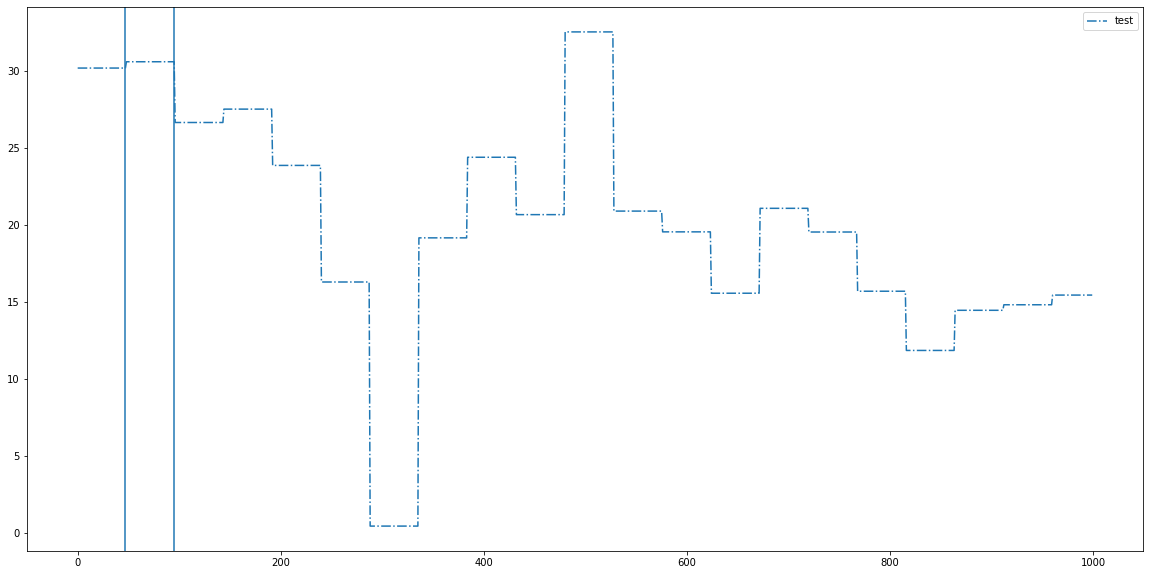

In [34]:
# plt.style.use('ggplot')
plt.figure(figsize=(20,10))
plt.plot(test_X[0:1000,1],'-.', label='test')
plt.axvline(x=47)
plt.axvline(x=95)
plt.legend()
plt.show()

In [81]:
test_Y

array([70.57, 64.47, 67.14, ...,  8.11,  8.1 ,  8.08])

In [5]:
predictedData = gbm.predict(test_X)
len(predictedData)

996864

In [13]:
predictedData[0:96]

array([ 72.11022185,  65.01949423,  66.92217629,  55.24080873,
        40.73462397,  50.17564022,  44.37183635,  50.61033905,
        51.38261778,  57.71400339,  60.93734087,  49.09198551,
        43.8870084 ,  37.58375894,  40.83370935,  37.74848404,
        31.60286431,  23.86614911,  27.43698871,  26.56664131,
        27.14496198,  24.63134632,  22.89803594,  25.93263422,
        31.7690476 ,  31.00441542,  24.92075641,  21.56889789,
        31.35415578,  27.99347589,  32.07475911,  34.63110401,
        51.65998254,  57.91559562,  64.59685682,  67.00730844,
        70.55655226,  73.0591622 ,  81.5076249 ,  81.1465926 ,
        77.34494239,  88.08721346,  93.931401  ,  92.6857661 ,
       100.53601328,  89.1486402 ,  86.90582856,  92.12571331,
        64.43906434,  67.55819239,  60.54218463,  40.02697201,
        53.62136729,  47.88139321,  58.35107648,  45.02646878,
        60.29919427,  61.56414384,  46.26791108,  36.71811077,
        38.86671547,  33.95705983,  27.97520102,  21.72

In [16]:
test_Y[48:96]
# len(test_Y)

array([ 64.47,  67.14,  55.72,  35.11,  52.42,  45.52,  52.28,  42.68,
        59.9 ,  59.57,  37.08,  29.83,  34.53,  38.43,  25.4 ,  23.14,
        21.3 ,  21.86,  24.04,  21.22,  19.97,  18.72,  28.55,  33.83,
        25.67,  17.84,  21.25,  23.62,  17.04,  22.4 ,  26.51,  47.56,
        44.04,  63.15,  58.14,  72.69,  74.7 ,  79.46,  70.61,  78.76,
        87.72,  98.72,  92.78, 104.21,  88.21,  83.5 ,  96.37,  83.41])

In [17]:
test_Y[0:48]

array([ 70.57,  64.47,  67.14,  55.72,  35.11,  52.42,  45.52,  52.28,
        42.68,  59.9 ,  59.57,  37.08,  29.83,  34.53,  38.43,  25.4 ,
        23.14,  21.3 ,  21.86,  24.04,  21.22,  19.97,  18.72,  28.55,
        33.83,  25.67,  17.84,  21.25,  23.62,  17.04,  22.4 ,  26.51,
        47.56,  44.04,  63.15,  58.14,  72.69,  74.7 ,  79.46,  70.61,
        78.76,  87.72,  98.72,  92.78, 104.21,  88.21,  83.5 ,  96.37])

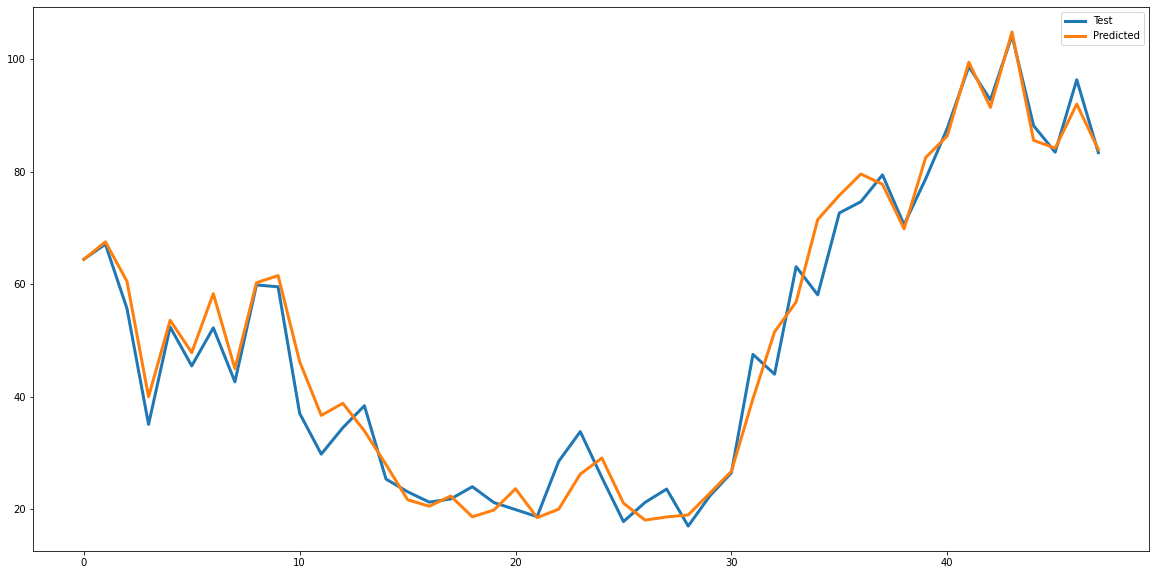

In [14]:
# plt.style.use('ggplot')
plt.figure(figsize=(20,10))
plt.plot(test_Y[48:96], linewidth=3, label='Test', )
plt.plot(predictedData[48:96], linewidth=3, label='Predicted')
plt.legend()
plt.show()

In [9]:

smape_scores= mean_absolute_error(predictedData,test_Y)

In [10]:
print("\nSmape score for all 4 pollutants:",smape_scores)


Smape score for all 4 pollutants: 2.9285148938529026
